In [87]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import cufflinks as cf

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode


cf.go_offline(connected=True)
init_notebook_mode(connected=True)

df = pd.read_csv('parts_gmv.csv')
ebay_parts_sales = pd.read_csv('ebay_parts_sales.csv')
df.gmv = pd.to_numeric(df.gmv, errors='raise')
df.gmv.quantile([.25, .5, .75])
print(df.head())
print(ebay_parts_sales.head())
ebay_parts_sales.count()/df.count()

      id      gmv
0   1201   987.84
1  11290   413.93
2  15984    84.20
3  17467  1002.18
4  28199  2079.77
      id   ebay_gmv
0  15984    4460.04
1  17467  323037.01
2  28199  146654.45
3  28361   12500.47
4  40906    1263.96


ebay_gmv         NaN
gmv              NaN
id          0.718927
dtype: float64

In [43]:
df = pd.merge(df, ebay_parts_sales, how='outer', on=['id'])
print(df.head())

      id      gmv   ebay_gmv
0   1201   987.84        NaN
1  11290   413.93        NaN
2  15984    84.20    4460.04
3  17467  1002.18  323037.01
4  28199  2079.77  146654.45


In [56]:
df['percent_of_ebay'] = round(df.gmv/df.ebay_gmv,2)
print(df.percent_of_ebay.mean())
df.sort_values(['gmv'], ascending=False)



0.24147347740668018


count       708.000000
mean       4483.894506
std       11500.439601
min           3.450000
25%         223.932500
50%         810.990000
75%        3790.765000
max      144424.830000
Name: gmv, dtype: float64

In [85]:
df.count() - df.ebay_gmv.isna().sum()

id                 509
gmv                509
ebay_gmv           310
percent_of_ebay    310
dtype: int64

In [60]:
top_25 = df[df.gmv > 3790]
top_25.describe()

,id,gmv,ebay_gmv,percent_of_ebay
count,1.770000e+02,177.000000,1.390000e+02,139.000000
mean,1.812187e+07,15568.053051,5.044740e+05,0.225971
std,9.501584e+06,19084.459958,1.275475e+06,0.971971
min,8.819900e+04,3829.000000,4.187510e+03,0.000000
25%,9.975221e+06,5814.870000,6.602801e+04,0.025000
50%,1.897391e+07,8775.230000,2.487867e+05,0.050000
75%,2.633338e+07,17721.250000,4.792644e+05,0.140000
max,3.571445e+07,144424.830000,1.382979e+07,11.000000


/Users/kevin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



(0, 20000)

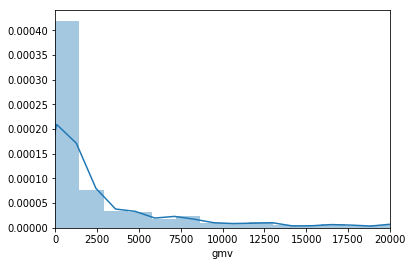

In [82]:

sns.distplot(df.gmv,bins=100, norm_hist=True)
plt.ylim(0, None)
plt.xlim(0, 20000)


In [64]:
round(df.gmv.describe())

count       708.0
mean       4484.0
std       11500.0
min           3.0
25%         224.0
50%         811.0
75%        3791.0
max      144425.0
Name: gmv, dtype: float64